In [3]:
import pandas as pd
import numpy as np
import os

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# workspace_directory = r'C:\Users\trygg\Documents\Master_project' #HOME
workspace_directory = r'C:\Users\tryggvisi\Documents\my-awesome-masters-project' #WORK
os.chdir(workspace_directory)# Change the current working directory to the specified workspace


In [5]:
#import dataset from csv using numpy

path_data = r"Data\Vindefjallen_data\Vindefjallen_cleaning\exploratory_data_analysis\3_data_cleaning\_maybe_final_measurements_clean_basic.csv"
df = pd.read_csv(path_data)
#print column names
print(df.columns)
#select only the columns snow_depth and temperature to new df
df = df[['TriangleCorner', 'snow_depth', 'temperature', 'point_VH', 'point_VV', 'points_angle', 'VHVV_ratio']]


#show type of each column
#convert temperature default_value to -1
df['temperature'] = df['temperature'].replace('default_value', -1)
#convert nan to -1

df['temperature'] = df['temperature'].str.replace(',','.').astype(float)
df['temperature'] = df['temperature'].replace(np.nan, -1)

print(df.dtypes)

#find NaN values
# print(df.isnull().sum())
#show every row of temperatre
# print(df['temperature'])
#remove all rows with trianglecorner = AC-28C
df = df[df.TriangleCorner != 'AC-28C']
df.head(6)

Index(['Unnamed: 0', 'TriangleCorner', 'date', 'snow_depth', 'temperature',
       'MiddleTime', 'point_VH', 'point_VV', 'points_angle', 'VHVV_ratio',
       'log_snow_depth', 'log_VHVV_ratio'],
      dtype='object')
TriangleCorner     object
snow_depth          int64
temperature       float64
point_VH          float64
point_VV          float64
points_angle      float64
VHVV_ratio        float64
dtype: object


,TriangleCorner,snow_depth,temperature,point_VH,point_VV,points_angle,VHVV_ratio
0,AC-42C,110,-5.0,0.021,0.093,46.351,0.23
1,AC-31A,20,-8.0,0.013,0.088,44.248,0.15
2,AC-31C,65,-8.0,0.017,0.103,43.178,0.17
3,AC-38B,75,-10.0,0.012,0.080,35.335,0.15
4,AC-38C,75,-10.0,0.014,0.108,32.779,0.13
5,AC-38A,50,-10.0,0.013,0.084,39.565,0.15


## data analysis

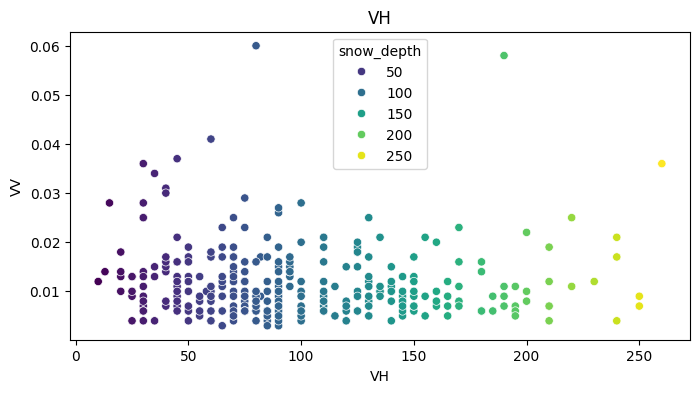

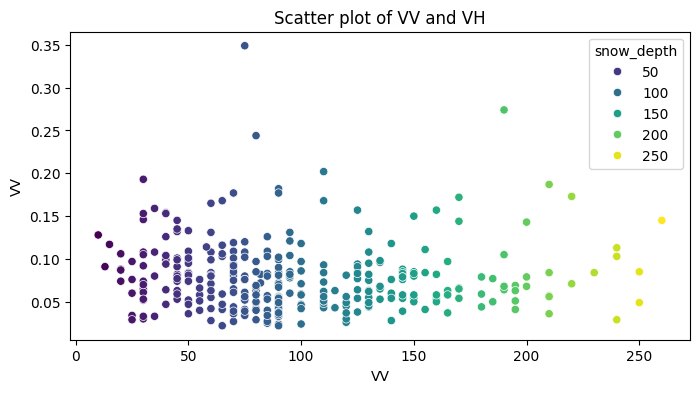

In [92]:
# plot vv and vh ratio
import matplotlib.pyplot as plt
import seaborn as sns


#fit a trend line
plt.figure(figsize=(8, 4))
sns.scatterplot(x='snow_depth', y='point_VH', data=df, hue='snow_depth', palette='viridis')
plt.title('VH')
plt.xlabel('VH')
plt.ylabel('VV')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='snow_depth', y='point_VV', data=df, hue='snow_depth', palette='viridis')
plt.title('Scatter plot of VV and VH')
plt.xlabel('VV')
plt.ylabel('VV')
plt.show()

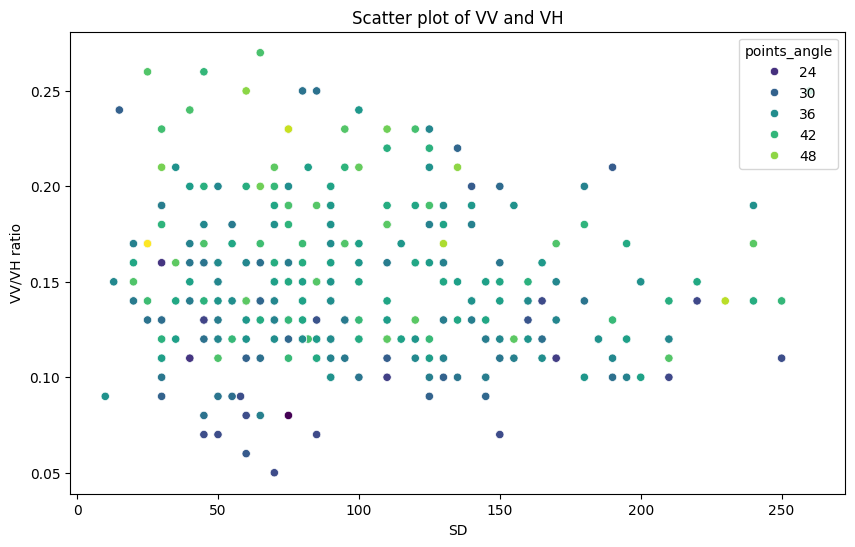

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='snow_depth', y='VHVV_ratio', data=df, hue='points_angle', palette='viridis')
plt.title('Scatter plot of VV and VH')
plt.xlabel('SD')
plt.ylabel('VV/VH ratio')
plt.show();

## Setup data

In [93]:
X = df.loc[:,'temperature':'VHVV_ratio']

y = df['snow_depth']

In [94]:
df_reduced = df[df['snow_depth'] >100]
X = df_reduced.loc[:,'point_VH':'VHVV_ratio']
X.drop(columns=['points_angle'], inplace=True)
# X = df.loc[:,'temperature':'VHVV_ratio']

y = df_reduced['snow_depth']

In [95]:
X

,point_VH,point_VV,VHVV_ratio
0,0.021,0.093,0.23
11,0.015,0.084,0.18
12,0.021,0.111,0.19
22,0.011,0.063,0.17
28,0.009,0.085,0.11
...,...,...,...
305,0.007,0.056,0.12
306,0.015,0.118,0.13
308,0.010,0.084,0.12
310,0.007,0.079,0.09


## Decision Trees for Classification and Regression


https://www.codecademy.com/article/mlfun-decision-trees-article#heading

In [35]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))

0.040687583318493536


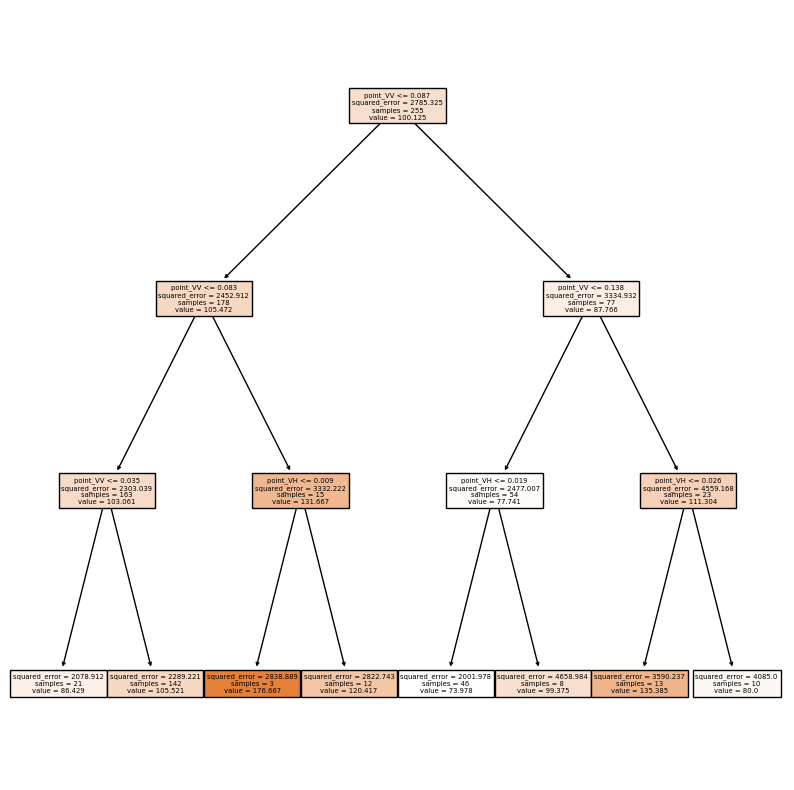

In [36]:
from matplotlib import pyplot as plt
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names = x_train.columns,  
               max_depth=3, filled=True);

# Random forest regression

prófa að fylgja https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [96]:
from sklearn.model_selection import train_test_split

SEED = 42


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20, # 20 trees
                            max_depth=3, # 4 levels
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

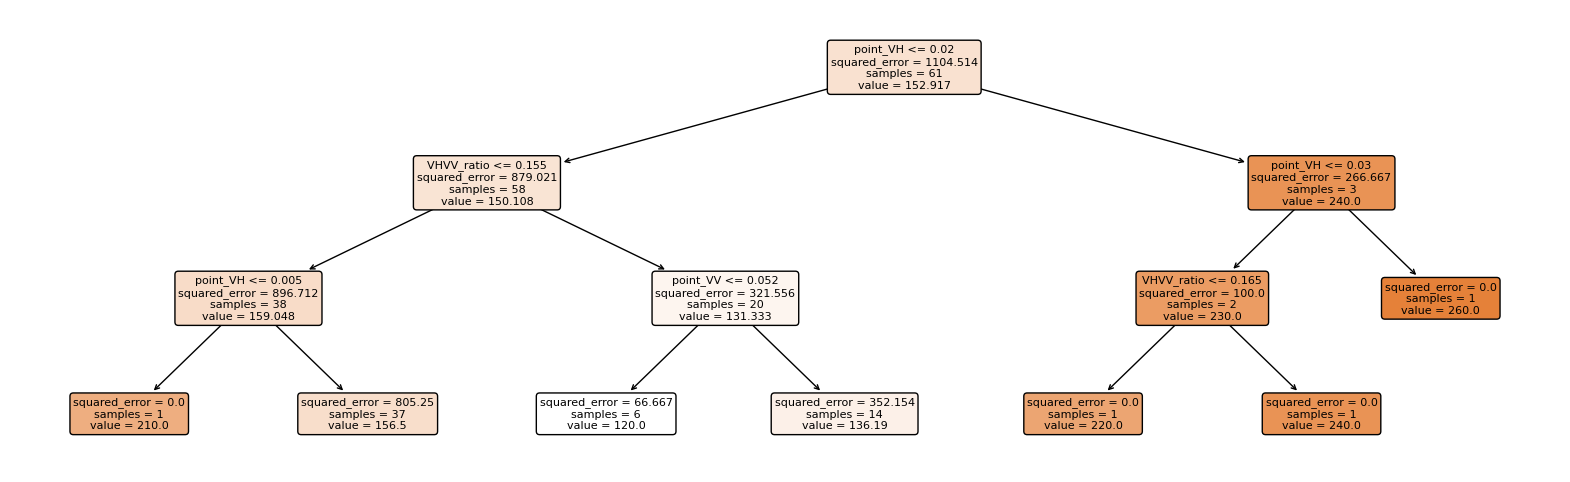

In [97]:
from sklearn import tree

features = X.columns
# Obtain just the first tree
first_tree = rfr.estimators_[0]

plt.figure(figsize=(20,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8, 
               filled=True, 
               rounded=True);

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 37.77385061520942
Mean Squared Error: 1958.6980927959905
Root Mean Squared Error: 44.25718125678578


## Mean model

In [149]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)  # Features
y = np.random.rand(100)      # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dummy regressor that always predicts the mean of the target variable
dummy_regressor = DummyRegressor(strategy='mean')

# Fit the dummy regressor (no need to actually fit it)
dummy_regressor.fit(X_train, y_train)

# Make predictions using the dummy regressor
predictions = dummy_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE) of the baseline model
mae_baseline = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error (Baseline):", mae_baseline)


Mean Absolute Error (Baseline): 0.307776180213465


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dummy regressor that always predicts the mean of the target variable
dummy_regressor = DummyRegressor(strategy='mean')

# Fit the dummy regressor (no need to actually fit it)
dummy_regressor.fit(X_train, y_train)

# Make predictions using the dummy regressor
predictions = dummy_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE) of the baseline model
mae_baseline = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error (Baseline):", mae_baseline)

Mean Absolute Error (Baseline): 43.200367647058826


## Multipler linear regression


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)


LinearRegression()

In [23]:
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [24]:
print(test_set_rmse)
print(test_set_r2)

36.99966773884811
0.0824561576506988


## Polynomial regression



In [42]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data
# np.random.seed(0)
# X = np.random.rand(100, 1) * 10
# y = 0.5 * X**2 - 3 * X + 2 + np.random.randn(100, 1)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degree
degree = 0.5

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly_features.transform(X)), color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


InvalidParameterError: The 'degree' parameter of PolynomialFeatures must be an int in the range [0, inf) or an array-like. Got 0.5 instead.